# Movie Recomendations with Matrix Completion


Consider a matrix where the rows are Netflix users, the columns are movies, and the entries are the ratings each user gives each movie.  This matrix is going to be very sparesly filled in, because most people are going to watch just a small fraction of the movies on netflix, but if we can predict entries of the matrix, then we could recomend movies someone hasn't seen yet.

We're going to assume that the data is approximately _low-rank_, which means that each column can be approximated with a linear combination of just a handful of other columns. Let’s take the movies Breakfast Club and Pretty in Pink as an example. I would bet that the way individuals rate these two movies is highly correlated, and the columns associated with each movie should be very similiar. Now lets throw Titanic into the mix. While I wouldn’t expect it to be the same, it might be similiar. It might also be similiar to other period pieces featuring forbidden love, like Pride and Prejudice, or movies with Leonardo DeCaprio, like Wolf of Wallstreet. So, I would expect that the ratings for Titanic might look like an average of the ratings for all of these movies. The point is that the ratings for a specific movie should be pretty close to a linear combination of ratings of just a few other similiar movies.

A common dataset for movie recommendations comes from MovieLens, and though they have datasets with 25 million ratings, we’re going to stick with 1 million for simplicity.  The data can be downloaded from grouplens.org, or with the following bash commands:

In [4]:
!curl https://files.grouplens.org/datasets/movielens/ml-1m.zip -O
!unzip ml-1m.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 5778k  100 5778k    0     0  3979k      0  0:00:01  0:00:01 --:--:-- 3977k
Archive:  ml-1m.zip
   creating: ml-1m/
  inflating: ml-1m/movies.dat        
  inflating: ml-1m/ratings.dat       
  inflating: ml-1m/README            
  inflating: ml-1m/users.dat         


Read the data in with Numpy:

In [8]:
import numpy as np
data = np.loadtxt('ml-1m/ratings.dat',delimiter='::' )
print(data[:][0:3])

[[1.00000000e+00 1.19300000e+03 5.00000000e+00 9.78300760e+08]
 [1.00000000e+00 6.61000000e+02 3.00000000e+00 9.78302109e+08]
 [1.00000000e+00 9.14000000e+02 3.00000000e+00 9.78301968e+08]]


The first column is the user ID, the second is the movie ID, the third is the rating (1,2,3,4, or 5), and the last is a time stamp (which we don't need to worry about).  We want the rows of the matrix to be users, and the columns should be movies. 

Next we divide the data into training and testing sets.  Note that we're also going to subtract 3 from each of the ratings that way the middle value is 0.

In [33]:
X=data[:, [0,1]].astype(int)-1
y=data[:,2] - 3

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [34]:
from spalor.models import MC
from statistics import mean

mc_model=MC(n_components=5)
mc_model.fit(X_train, y_train)
y_predict=mc_model.predict(X_test.T)

print("MAE:",mean(abs(y_test-y_predict)))
print("Percent of predictions off my less than 1: ",np.sum(abs(y_test-y_predict)<1)/len(y_test))

MAE: 0.7066785169566365
Percent of predictions off my less than 1:  0.7507023525059737


The values of `y_test` are integers, so for each of the 5 ratings, we'll make a box plot of corresponding values of`y_predict`.

Text(0.5, 0, 'y_predict')

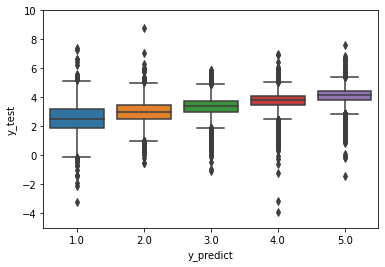

In [35]:
import seaborn as sns
ax=sns.boxplot(x=y_test+3, y=y_predict+3)
ax.set_ylim(-5, 10)
ax.set_ylabel("y_test")
ax.set_xlabel("y_predict")